# Sahil Chawla

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Research question/interests

## My Interest in the Project

My group has chosen the topic of US Police shootings in from 2015-22. Through this project my group and I are trying to draw out conclusions, and gain a better understanding of how there are particular trends in the shootings that happen in america. I am aiming to learn how these shootings that take place, target people of particular gender, race, not mentally fine etc. The dataset also contains infromtaion on the coty and state where the shooting took place, so places that are more dangerous than others in this regard can be found out from an analysis of the dataset. 

## Main Variables Involved

In [3]:
df=pd.read_csv("../data/US Police shootings in from 2015-22 2.csv")
df.shape
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7729 entries, 0 to 7728
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7729 non-null   int64  
 1   name                     7312 non-null   object 
 2   date                     7729 non-null   object 
 3   manner_of_death          7729 non-null   object 
 4   armed                    7520 non-null   object 
 5   age                      7247 non-null   float64
 6   gender                   7709 non-null   object 
 7   race                     6269 non-null   object 
 8   city                     7729 non-null   object 
 9   state                    7729 non-null   object 
 10  signs_of_mental_illness  7729 non-null   bool   
 11  threat_level             7729 non-null   object 
 12  flee                     6854 non-null   object 
 13  body_camera              7729 non-null   bool   
 14  longitude               

In [8]:
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'],
      dtype='object')

In [10]:
df.nunique(axis=0)
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,age,longitude,latitude
count,7729.000000,7247.000000,6892.000000,6892.000000
mean,3865.000000,37.178971,-97.059875,36.682999
std,2231.314448,12.966191,16.595557,5.402749
min,1.000000,2.000000,-160.007000,19.498000
25%,1933.000000,27.000000,-112.039000,33.480000
50%,3865.000000,35.000000,-94.226000,36.104500
75%,5797.000000,45.000000,-83.073250,40.032250
max,7729.000000,92.000000,-67.867000,71.301000


## Cleaning the Dataset

#### Data with NULL Values

In [17]:
if df.isnull().any(axis=None):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(df[df.isnull().any(axis=1)].head(3))
    plt.show()


Preview of data with null values:
xxxxxxxxxxxxx
    id            name        date manner_of_death armed   age gender race  \
15  16   Loren Simpson  2015-01-08            shot   NaN  28.0      M    W   
26  27   Marcus Golden  2015-01-14            shot   NaN  24.0      M    B   
27  28  Michael Goebel  2015-01-14            shot   NaN  29.0      M    W   

               city state  signs_of_mental_illness  threat_level         flee  \
15          Huntley    MT                    False  undetermined  Not fleeing   
26         St. Paul    MN                    False        attack  Not fleeing   
27  Franklin County    MO                    False        attack  Not fleeing   

    body_camera  longitude  latitude  is_geocoding_exact  
15        False   -108.315    45.859                True  
26        False    -93.094    44.958                True  
27        False    -90.794    38.317                True  


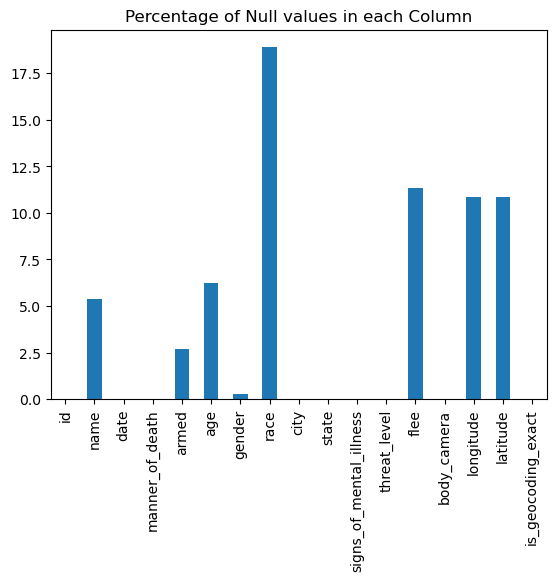

In [5]:
null = df.isnull().sum()/df.shape[0]*100
null.plot(kind='bar')
plt.title("Percentage of Null values in each Column")
plt.show()

#### Checking for Duplicate Values

In [18]:
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


## Visualizations

### How many of the Cops had Body-Camera on during the time of the Incident

<AxesSubplot:xlabel='body_camera', ylabel='count'>

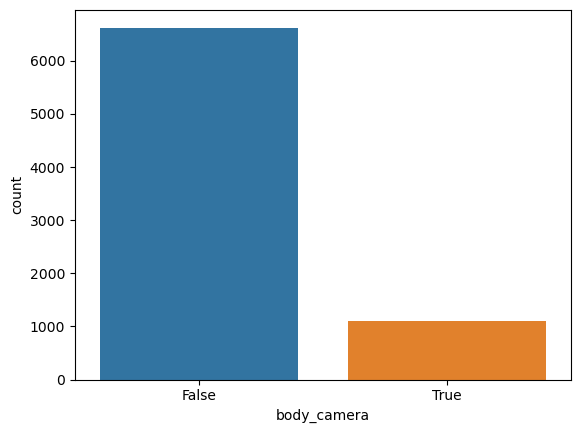

In [23]:
sns.countplot(x ='body_camera', data = df)

### Counts of Shooting Based on Race

<AxesSubplot:xlabel='race', ylabel='count'>

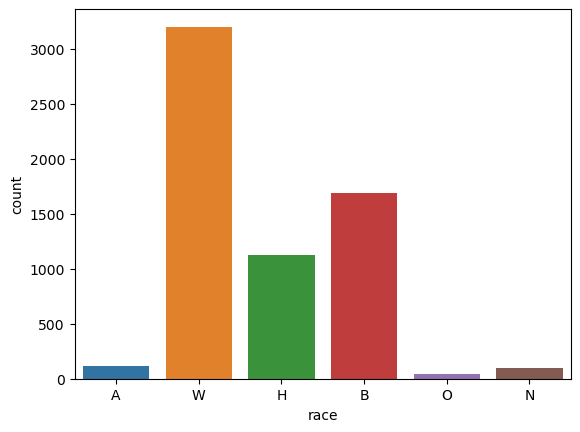

In [22]:
sns.countplot(x ='race', data = df)

### Whether the Person had any Mental-illness or Not

<AxesSubplot:xlabel='signs_of_mental_illness', ylabel='count'>

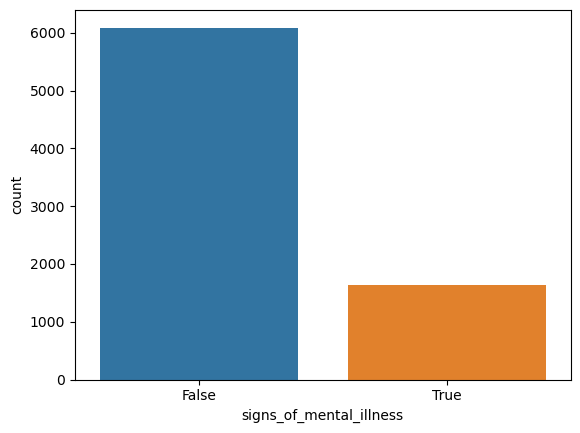

In [27]:
sns.countplot(x ='signs_of_mental_illness', data = df)

## Task 2

#### Removing extra Columns

In [7]:
new_data=df.drop(['latitude','longitude','is_geocoding_exact'], axis=1)
new_data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


### 

In [14]:
shootings_data = new_data.drop(['name'],axis=1)
shootings_data['age'] = shootings_data['age'].astype('str')
shootings_data.head()

,id,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,1,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,2,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,3,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,4,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,5,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [10]:
shootings_data.age.value_counts()

31.0    254
32.0    252
27.0    249
34.0    247
33.0    242
       ... 
78.0      1
89.0      1
8.0       1
92.0      1
2.0       1
Name: age, Length: 81, dtype: int64

In [11]:
shootings_data['age'].unique()


array([53., 47., 23., 32., 39., 18., 22., 35., 34., 25., 31., 41., 30.,
       37., 28., 42., 36., 49., 71., 33., 29., 43., 24., 75., 68., 27.,
       48., 21., 67., 19., 54., 17., 56., 61., 45., 26., 40., 59., 38.,
       51., 74., 57., 46., 16., 50., 20., 77., nan, 58., 64., 52., 63.,
       44., 60., 66., 83., 72., 76., 62., 55., 69., 86., 15., 65.,  6.,
       12., 70., 80., 14., 82., 13., 73., 91., 79., 78., 84., 81., 89.,
       88.,  8., 92.,  2.])

In [18]:
age_groups=list(shootings_data['age'].unique())
def ages(age):
    for value in age_groups:
        if value>65:
            return "Elderly"
        elif value>30:
            return "Middle Aged"
        elif value>18:
            return "Youth"
        else :
            return "Child"
        
shootings_data['age'] = shootings_data['age'].apply(ages)
    

NameError: name 'Int' is not defined

In [21]:
shootings_data['race'].unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [22]:
shootings_data['gender'].unique()

array(['M', 'F', nan], dtype=object)

In [23]:
shootings_data['armed'].unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', nan, 'shovel',
       'vehicle', 'hammer', 'hatchet', 'sword', 'machete', 'box cutter',
       'undetermined', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'BB gun', 'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver',
       'carjack', 'chain', "contractor's level", 'railroad spikes',
       'stapler', 'beer bottle', 'unknown weapon', 'binoculars',
       'pellet gun', 'bean-bag gun', 'baseball bat and fireplace poker',
       'straight edge razor', 'gun and knife', 'ax', 'brick',
       'baseball bat', 'hand torch', 'chain saw', 'garden tool',
       'pair of scissors', 'pole', 'pick-axe', 'flashlight', 'baton',
       'spear', 'chair', 'pitchfork', 'hatchet and gun', 'rock',
       'piece of wood', 'pipe', 'glass shard', 'motorcycle',
       'pepper spray', 'metal rake